# Coupling CEM and HydroTrend to assess links between rivers and coastal morphology
In this lab, you will use a coupled Coastal Evolution Model (CEM) and HydroTrend model to study the effects of coastal river drainage discharge on sandy shoreline change through time. 
* Hydrotrend is a 2D numerical model that operates using a water and sediment budget and delivers a daily sediment output to a river outlet. Read more about it here: https://csdms.colorado.edu/wiki/Model:HydroTrend.
* CEM, on the other hand, is a 2D numerical model that addresses wave-driven morphological change undergoing sandy coastal systems. Read more about it here: http://csdms.colorado.edu/wiki/Model_help:CEM   

### Parameters of interest
Hydrotrend requires inputs of various watershed-specific information including hypsometric, climatic, lithologic, and anthropogenic data.  It creates time-step specific temperature and precipitation scenarios that affect weathering and sediment transport rates across the drainage basin 
and gives an output of daily sediment loads. For this lab, we have included the past 20 years of climatic data. 

CEM requires wave-climate data and shoreline position inputs and solves for sediment transport and shoreline morphological change including spit formation and erosion. 

### Case Study: the effects of the Coquilles River on the southern Oregon coastline
![Image](data/CoquilleRiverMouth.jpg)
photo credit: coastview.org

The Coquilles River is a ~60-km long river that drains 2,740 $\text{km}^{2}$ of the Coast range in Oregon. Over the past century, it has experienced intense anthropogenic disturbances including channel dredging, gravel bar mining, and deforestoration. <u>This lab explores the impact of anthropogenic and climate-change disturbances within the watershed on coastline change.</u>  

### Links
* Link to this notebook: 
* Package installation commands: 
* Command to download a local copy: 

### Key References

Ashton, A.D., Hutton, E.W.H., Kettner, A.J., Xing, F., Kallumadikal, J., Nienhuis, J., Giosan, L. (2013) Progress in coupling models of coastline and fluvial dynamics. Computers & Geosciences (53), 21–29. https://doi.org/10.1016/j.cageo.2012.04.004.

Warrick, J. A., Vos, K., East, A. E. & Vitousek, S. (2022). Fire (plus) flood (equals) beach: coastal response to an exceptional river sediment discharge event. Scientific Reports, 12(1), 3848. https://doi.org/10.1038/s41598-022-07209-0

## Visualizing Coquille River watershed elevation
To construct the elevation input, we analyzed elevation data from the Coquille River watershed using the overland flow lab (link here: https://csdms.colorado.edu/wiki/Lab-0030). Based on these data, we analyzed the hypsometry for this watershed, which you can visualize in a histogram below.

![Image](data/hydrotrend/coquille_watershed_topography.png)

In [1]:
# To start, import numpy and matplotlib.
import matplotlib.pyplot as plt
import numpy as np
# show the hypsometry datafile
# %cat ./data/hydrotrend/CoquilleRiver/HYDRO0.HYPS
%cat data/hydrotrend/CoquilleRiver/HYDRO0.HYPS

-------------------------------------------------
Hypsometry input file for HYDROTREND
First line: number of hypsometric bins
Other lines: altitude (m) and area in (km^2) data
-------------------------------------------------
25
1 284.810
51 600.962
101 929.944
151 1225.613
201 1471.680
251 1686.979
301 1899.533
351 2100.997
401 2276.755
451 2432.700
501 2569.220
551 2696.943
601 2824.476
651 2952.432
701 3082.893
751 3204.608
801 3296.835
851 3367.637
901 3426.163
951 3467.336
1001 3496.404
1051 3515.685
1101 3524.295
1151 3527.614
1201 3527.950

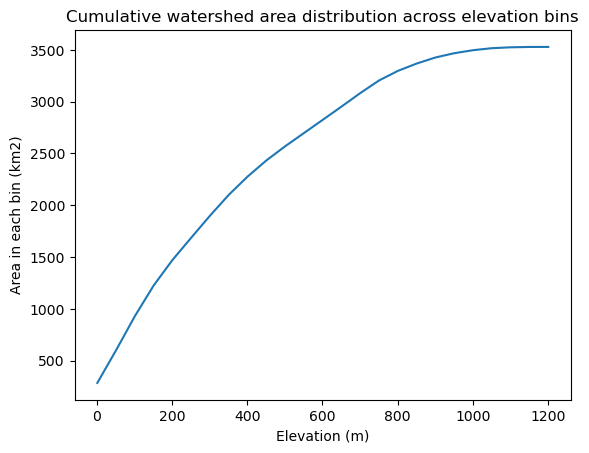

In [2]:
#plot the histogram of elevation data across the water shed. Each x-axis bin represents ~50m worth of elevation
bins = np.loadtxt('data/hydrotrend/hydro_bins.txt')
plt.plot(bins[:,0],bins[:,1])
plt.xlabel("Elevation (m)") 
plt.ylabel("Area in each bin (km2)")
plt.title("Cumulative watershed area distribution across elevation bins")
plt.show()

## Parameterizing Hydrotrend to Coquille River watershed
These parameters are set for the Coquilles River from 2000 to 2020 C.E. based on climate data from https://www.weather.gov/wrh/climate?wfo=mfr. 

In [3]:
# show the second input file for hydrotrend that includes climatic, lithologic, and anthropogenic data
%cat data/hydrotrend/CoquilleRiver/HYDRO.IN

Coquille 20yrs present
ON				2) Write output to ASCII files (ON/OFF)
./HYDRO_OUTPUT/		3) Location where the output data will be stored (not optional for web)
1				4) No. of epochs to run (leave 1 line blank between epochs; start copying from nr 5)
2000 20 d		5) Start year; no. of years to run; averaging interval: D,M,S or Y
1				6) Number of suspended sed. grain sizes to simulate (max 10)
1        	7) Proportion of sediment in each grain size (sum=1)
11.82 0.0 1.08  8) Yrly Tbar: start (C), change/yr (C/a), std dev
0.11 0.0 0.1 9) Yrly P sum: start (m/a), change/yr (m/a/a), std. dev (m).
1. 1.9 7	10) Rain: Mass Balance Coef, Distribution Exp, Distribution Range
1.1		11) Constant annual base flow (m^3/s)
Jan  7.7037037  1.32718305 211.84809524 120.15411959 12-23) monthly climate variables
Feb  8.02116402  1.34436313 164.084 87.81055891 column  variable	description
Mar  8.91534392  1.40217131 176.6267619 86.39817965 ------  --------	-----------
Apr  10.2962963  1.22909723 116.7003 50.379

## Running HydroTrend

In [4]:
import pymt
import pymt.models
hydrotrend = pymt.models.Hydrotrend()

## [rewrite in own words, but info is correct]
For this case study, first we will create a subdirectory in which the Coquille River simulation will be implemented.

Then we specify for how long we will run a simulation: for 20 years at daily time-step. This means you run Hydrotrend for 7300 days total. This is also the line of code where you would add other input parameters with their values.

### Check model outputs

In [5]:
# In pymt one can always find out what output a model generates by using the .output_var_names method.
hydrotrend.output_var_names

('atmosphere_bottom_air__domain_mean_of_temperature',
 'channel_exit_water_sediment~suspended__mass_flow_rate',
 'channel_exit_water_flow__speed',
 'channel_entrance_water_sediment~bedload__mass_flow_rate',
 'channel_exit_water__volume_flow_rate',
 'channel_exit_water_x-section__width',
 'channel_exit_water_x-section__depth',
 'channel_entrance_water__volume_flow_rate',
 'atmosphere_water__domain_mean_of_precipitation_leq-volume_flux',
 'channel_exit_water_sediment~bedload__mass_flow_rate',
 'channel_exit_water_sediment~suspended__mass_concentration')

### Setting up the model

In [37]:
# Set up Hydrotrend model by indicating the number of years to run
#config_file, config_folder = hydrotrend.setup("CoquilleRiver")

In [51]:
config_file = 'hydro_config.txt'
config_folder = 'data/hydrotrend/CoquilleRiver'

In [52]:
# Now we initialize the model with the configure file and in the configure folder
hydrotrend.initialize(config_file, config_folder)

  Read_Rainfall_Etc MESSAGE: Unable to open input file ./HYDRO.CLIMATE 
    Hydrotrend will generate it's own climate values based on
    line 12-23 of the input values in the input file.

  openfiles WARNING: Unable to open the earthquake data file ./HYDRO0.QUAKE 
    Hydrotrend will run without the earthquake routine  for epoch 0
 Calculate mean discharge, epoch: 1
 Calculate daily discharge, epoch: 1
 Calculate mean suspended sediment load, epoch: 1
 Calculate daily suspended sediment load, epoch: 1


In [53]:
# this line of code lists time parameters, when, how long and at what timestep will the model simulation work?
hydrotrend.start_time, hydrotrend.time, hydrotrend.end_time, hydrotrend.time_step, hydrotrend.time_units

(0.0, 0.0, 7300.0, 1.0, 'd')

### Run the simulation

In [54]:
# this code declares numpy arrays for several important parameters we want to save.
n_days = int(hydrotrend.end_time)
q = np.empty(n_days)  # river discharge at the outlet
qs = np.empty(n_days)  # sediment load at the outlet
cs = np.empty(
    n_days
)  # suspended sediment concentration for different grainsize classes at the outlet
qb = np.empty(n_days)  # bedload at the outlet

# here we have coded up the time loop using i as the index
# we update the model with one timestep at the time, untill we reach the end time
# for each time step we also get the values for the output parameters we wish to
for i in range(n_days):
    hydrotrend.update()
    q[i] = hydrotrend.get_value("channel_exit_water__volume_flow_rate")
    qs[i] = hydrotrend.get_value(
        "channel_exit_water_sediment~suspended__mass_flow_rate"
    )
    cs[i] = hydrotrend.get_value(
        "channel_exit_water_sediment~suspended__mass_concentration"
    )
    qb[i] = hydrotrend.get_value("channel_exit_water_sediment~bedload__mass_flow_rate")

/tmp/ipykernel_945697/1707105188.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  q[i] = hydrotrend.get_value("channel_exit_water__volume_flow_rate")
/tmp/ipykernel_945697/1707105188.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  qs[i] = hydrotrend.get_value(
/tmp/ipykernel_945697/1707105188.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cs[i] = hydrotrend.get_value(
/tmp/ipykernel_945697/1707105188.py:22: DeprecationWarning: Conversion of an array 

### Plot outputs
#### River Discharge

9.40580555422


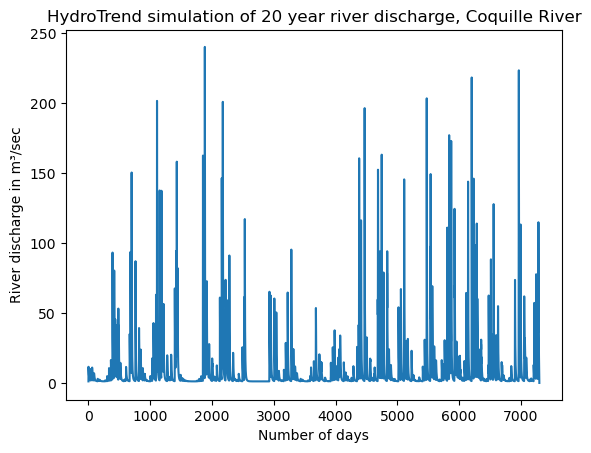

In [55]:
# We can plot the simulated output timeseries of Hydrotrend, for example the river discharge

plt.plot(q)
plt.title("HydroTrend simulation of 20 year river discharge, Coquille River")
plt.ylabel("River discharge in m³/sec")
plt.xlabel("Number of days")
plt.show
print(np.mean(q))

#### Bedload flux

The average bedload discharge is 0.48 kg/s


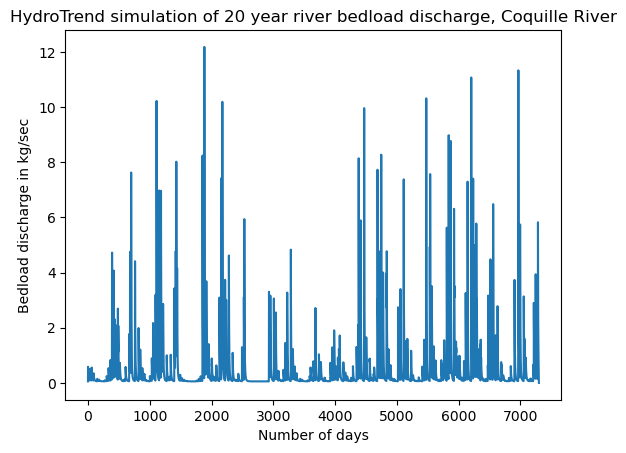

In [56]:
plt.plot(qb)
plt.title("HydroTrend simulation of 20 year river bedload discharge, Coquille River")
plt.ylabel("Bedload discharge in kg/sec")
plt.xlabel("Number of days")
plt.show
print(f"The average bedload discharge is {np.mean(qb):.2f} kg/s")

## Correcting for sand dredging and mining activity
Since 1880, the Army Corps of Engineers has dredged Coquille River mouth for navigation purposes. Over 533,000 m³ of sediment, mostly sand, was removed from the last 2 km stretch of the Coquille River between 1986 and 2010. Below, you will calculate the average annual removal rate of sand and convert that to a kg/sec rate for correcting model outputs to mirror that of anthropogenic disturbance. 

Additionally, companies have received rights to mine gravel sandbars along 100s of km of the Ciquolle River. 

In [57]:
annual_removal_vol=533000/(2010-1986)
print(f"The average historic removal rate is {annual_removal_vol:.2f} m³/yr")

#convert to bedload flux units of kg/sec, considering 1 m³ of dry sand weighs approximately 1682 kg. 
removalflux_ms=annual_removal_vol*1682/3.154e+7
print(f"The average removal rate in kg/s is {removalflux_ms:.2f}.")

The average historic removal rate is 22208.33 m³/yr
The average removal rate in kg/s is 1.18.


## Comparing observational and model data

/tmp/ipykernel_945697/2110290086.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


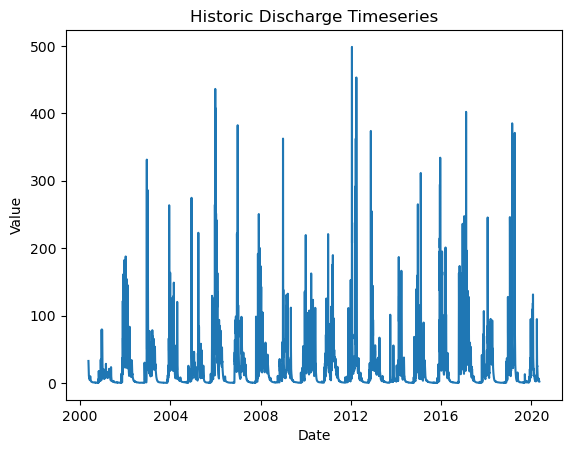

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from .csv file
df = pd.read_csv('data/hydrotrend/CoquilleHistoric.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

plt.plot(df['Date'], df['cms'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Historic Discharge Timeseries')
plt.show()

## Comparing statistics
Now you'll compare statistics (median, mean, and maximum) of the observational and modeled data. 

In [58]:
mean=np.mean(df['cms'])
print(f"The average historic (2000 to 2020 C.E.) discharge is {mean:.2f} m³/s")
median=np.nanmedian(df['cms'])
print(f"The median historic discharge is {median:.2f} m³/s")
max=np.max(df['cms'])
print(f"The maximum historic discharge is {max:.2f} m³/s")

The average historic (2000 to 2020 C.E.) discharge is 20.60 m³/s
The median historic discharge is 6.43 m³/s
The maximum historic discharge is 498.38 m³/s


## Calibrating model parameters to match historical 
What input parameters from the HYDRO.IN file do you think control water discharge? Play around with input parameters to more closely match the modeled statistics to those of the observational dataset. 

## Visualizing initial coastline along the Oregon coast

## Running CEM

## Comparing observational and model data 

## How does the coastline change with varying sediment load frequency and magnitude? Or antrho impacts? 
For this next exercise, you will change the inputs of hydrotrend to explore two different scenarios: 1) historic shoreline effects if humans had not extensively mined and dredged the Coquille River over the past several decades 2) a wildfire and flooding event which would deposit high loads of bedload to the coastline